In [1]:
import numpy as np
import skimage 
import cv2
import matplotlib.pyplot as plt 




def plot(image):
    plt.imshow(image)
    plt.show()
        


In [79]:
def plot_keypoints(image, kp):
    plt.figure(figsize= [10,10])
    plt.imshow(image)
    plt.scatter(kp[:,1], kp[:,0], marker= "o", color = "b", s = 100)
    plt.show()

In [7]:
left_image, right_image,_ = skimage.data.stereo_motorcycle()
print(left_image.shape, right_image.shape)

(500, 741, 3) (500, 741, 3)


#### orb feature descriptor

In [110]:
from skimage.feature import ORB, match_descriptors

keypoints = 10 

orb1 = ORB(n_keypoints= keypoints)
orb2 = ORB(n_keypoints= keypoints)

orb1.detect(left_image[:,:,0])
orb2.detect(right_image[:,:,0])


orb1.extract(left_image[:,:,0], orb1.keypoints, orb1.scales, orb1.orientations)
orb2.extract(right_image[:,:,0], orb2.keypoints,  orb2.scales, orb2.orientations)

# above 2 can be done in one 1 line
# orb1.detect_and_extract()

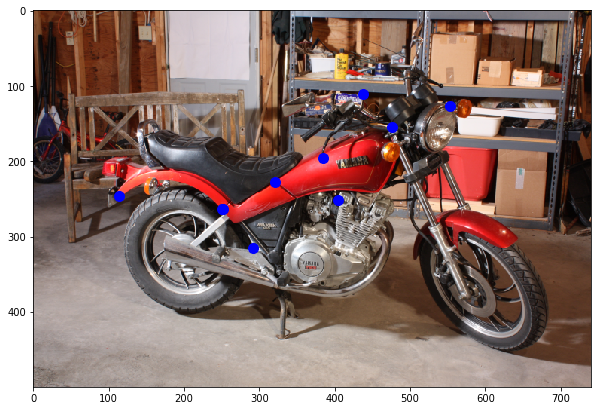

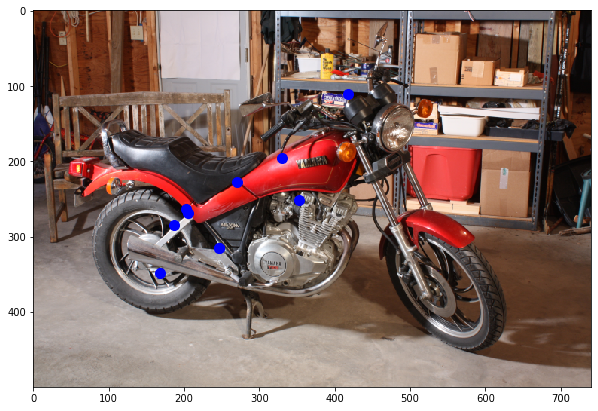

In [111]:
plot_keypoints(left_image, orb1.keypoints)
plot_keypoints(right_image, orb2.keypoints)

In [116]:
matches = match_descriptors(orb1.descriptors, orb2.descriptors, max_ratio= 0.95)

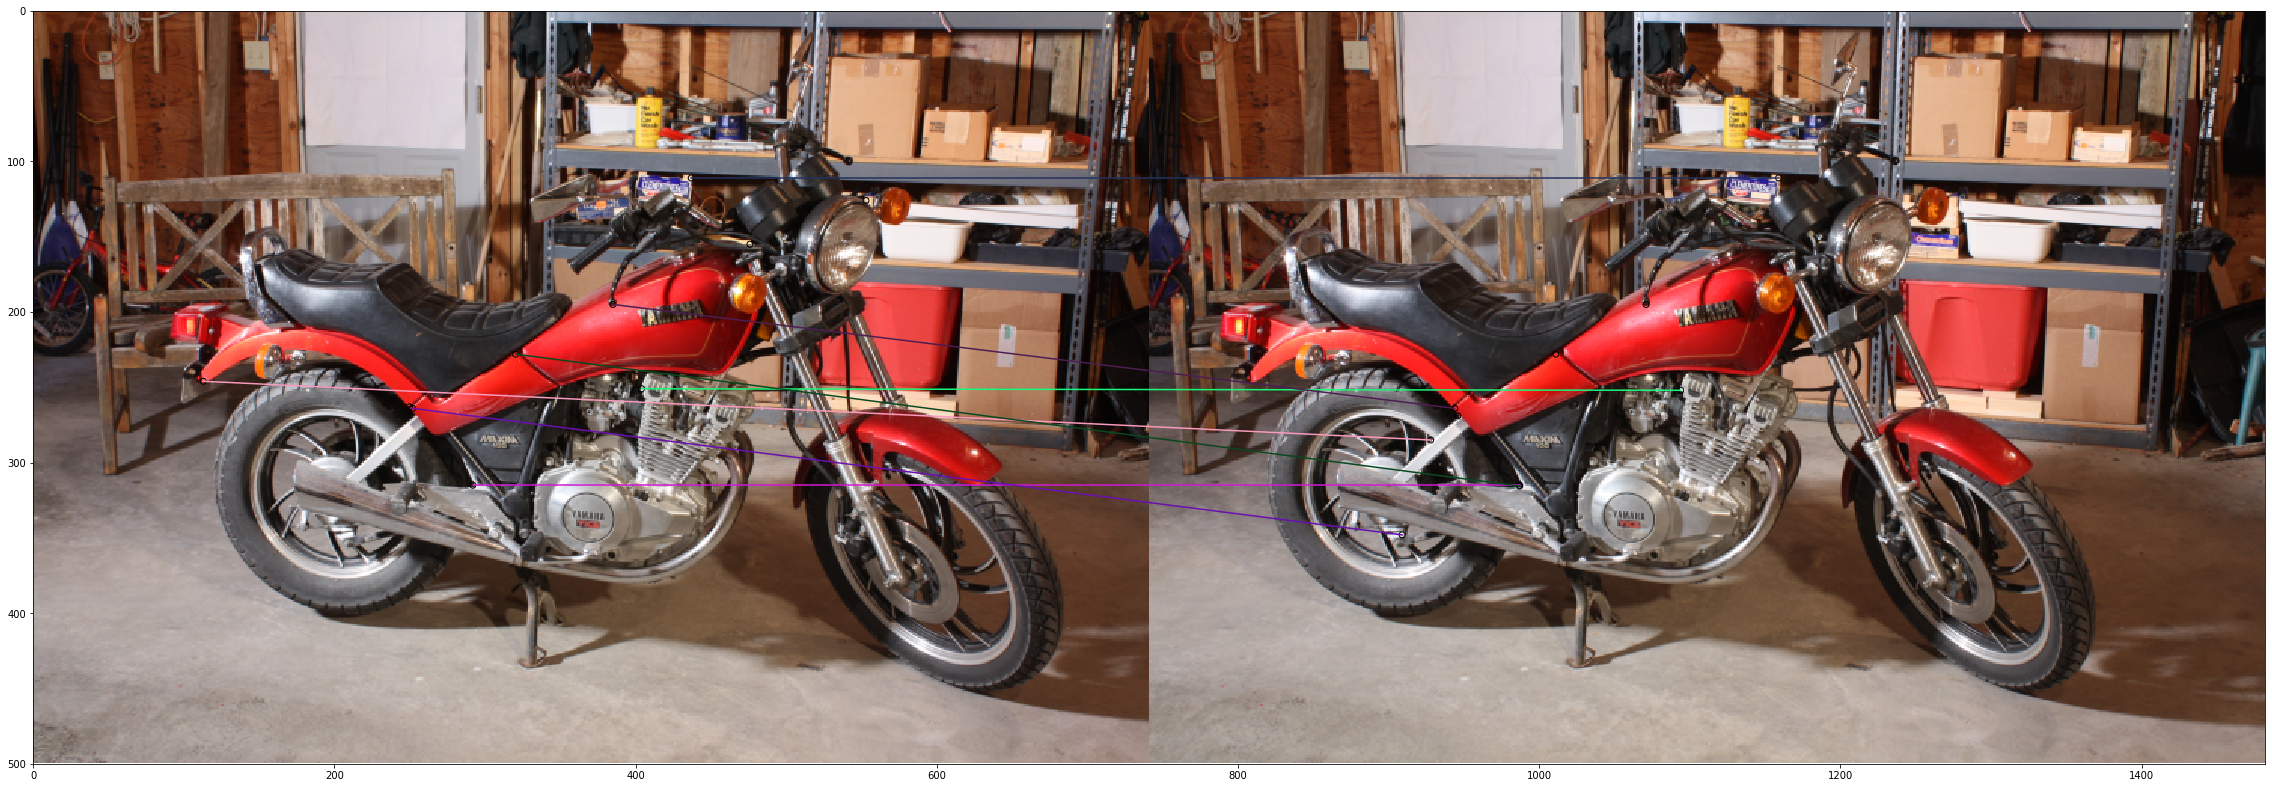

In [123]:
plt.figure(figsize=[40,40])
skimage.feature.plot_matches(plt, left_image, right_image, orb1.keypoints, orb2.keypoints, matches)

In [124]:
skimage.lookfor("match")

Search results for 'match'
--------------------------
skimage.feature.plot_matches
    Plot matched features.
skimage.feature.match_template
    Match a template to a 2-D or 3-D image using normalized correlation.
skimage.transform.resize
    Resize image to match a certain size.
skimage.exposure.match_histograms
    Adjust an image so that its cumulative histogram matches that of another.
skimage.feature.match_descriptors
    Brute-force matching of descriptors.
skimage.transform.match_histograms
    Adjust an image so that its cumulative histogram matches that of another.
skimage.metrics.contingency_table
    Return the contingency table for all regions in matched segmentations.
skimage.external.tifffile.TiffSequence
    Sequence of image files.
skimage._shared.utils.check_shape_equality
    Raise an error if the shape do not match.
skimage._shared._warnings.expected_warnings
    Context for use in testing to catch known warnings matching regexes
skimage.exposure.histogram_matching._

In [125]:
skimage.lookfor("optical flow")

Search results for 'optical flow'
---------------------------------
skimage.registration.optical_flow_tvl1
    Coarse to fine optical flow estimator.
skimage.registration._optical_flow._tvl1
    TV-L1 solver for optical flow estimation.
skimage.registration._optical_flow_utils.coarse_to_fine
    Generic coarse to fine solver.


In [126]:
from skimage import registration 


In [127]:
dir(registration)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_optical_flow',
 '_optical_flow_utils',
 'optical_flow_tvl1']

In [129]:
flow = registration.optical_flow_tvl1(left_image, right_image)

In [130]:
flow.shape 

(3, 500, 741, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


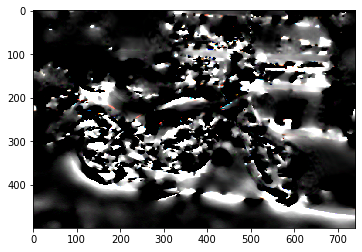

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


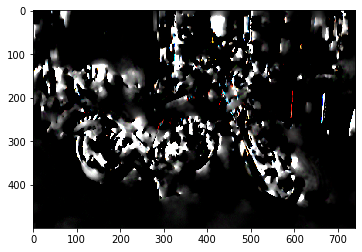

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


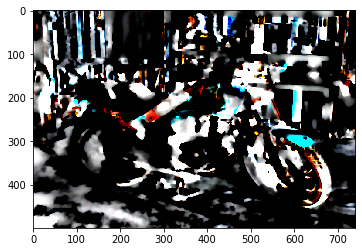

In [132]:
plot(flow[0])
plot(flow[1])
plot(flow[2])